# Trying gradient boosting algorithm

In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split, GridSearchCV

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import plot_tree, export_text
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('dataset/encoded_dataset_nov_17.csv')
df = df[df['Outcome Type'] != 'RETURN TO OWNER']
df.head(50)

,Type,Breed,Color,Sex,Size,Animal ID,Intake Date,Outcome Date,Days in Shelter,Intake Type,Outcome Type,Intake Condition,Outcome Condition,Age,Color_encoded,Sex_encoded,Intake Condition_encoded,Intake Type_encoded,Breed_encoded,Size_encoded
1,CAT,DOMESTIC SH,ORG TABBY/WHITE,Spayed,KITTN,A417889,05/30/2023,08/08/2023,70,STRAY,ADOPTION,UNKNOWN,HEALTHY,0,22,3,3,5,13,0
2,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,A418221,06/13/2023,08/08/2023,56,STRAY,ADOPTION,UNKNOWN,HEALTHY,0,0,2,3,5,13,0
3,CAT,SIAMESE/MIX,LYNX PT,Neutered,KITTN,A420264,09/12/2023,09/30/2023,18,OWNER SURRENDER,ADOPTION,HEALTHY,HEALTHY,0,18,2,0,3,34,0
4,CAT,DOMESTIC SH,BLACK,Neutered,KITTN,A419416,08/01/2023,09/30/2023,60,STRAY,ADOPTION,UNKNOWN,HEALTHY,0,0,2,3,5,13,0
5,CAT,DOMESTIC SH,BRN TABBY/WHITE,Spayed,KITTN,A419414,09/12/2023,09/30/2023,18,STRAY,ADOPTION,HEALTHY,HEALTHY,0,8,3,0,5,13,0
6,CAT,DOMESTIC MH,BRN TABBY/WHITE,Neutered,SMALL,A419755,08/17/2023,09/30/2023,44,STRAY,ADOPTION,HEALTHY,HEALTHY,2,8,2,0,5,11,3
7,CAT,DOMESTIC SH,GRAY TABBY,Neutered,KITTN,A420237,09/07/2023,09/30/2023,23,STRAY,ADOPTION,HEALTHY,HEALTHY,0,15,2,0,5,13,0
8,CAT,DOMESTIC SH,BLACK,Spayed,KITTN,A418629,06/27/2023,08/11/2023,45,STRAY,ADOPTION,HEALTHY,HEALTHY,0,0,3,0,5,13,0
9,CAT,DOMESTIC MH,BLACK,Neutered,SMALL,A418390,06/17/2023,08/11/2023,55,STRAY,ADOPTION,HEALTHY,HEALTHY,3,0,2,0,5,11,3
10,CAT,DOMESTIC MH,GRAY,Neutered,KITTN,A418894,07/08/2023,08/11/2023,34,STRAY,ADOPTION,HEALTHY,HEALTHY,0,14,2,0,5,11,0


In [3]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Select relevant columns
selected_columns = ['Color_encoded', 'Sex_encoded', 'Intake Condition_encoded', 'Intake Type_encoded','Size_encoded',
                    'Age','Breed_encoded','Days in Shelter']
df_selected = df[selected_columns]

# Drop rows with missing values
df_selected = df_selected.dropna()

# Split the data into features (X) and target variable (y)
X = df_selected.drop('Days in Shelter', axis=1)
y = df_selected['Days in Shelter']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')



Mean Squared Error: 472.7920508417867


In [4]:
feature_importance = pd.Series(gb_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

Intake Condition_encoded    0.355031
Age                         0.320361
Intake Type_encoded         0.159321
Color_encoded               0.050841
Size_encoded                0.048224
Sex_encoded                 0.036456
Breed_encoded               0.029766
dtype: float64


In [5]:
independent_variables = ['Color_encoded', 'Sex_encoded', 'Intake Condition_encoded', 'Intake Type_encoded','Size_encoded',
                    'Age','Breed_encoded']

dependent_variable = 'Days in Shelter'

In [6]:

# Specify the column containing the values you want to check for uniqueness

X = df[independent_variables]
y = df[dependent_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model
best_model = grid_search.best_estimator_

# Now let's evaluate our model on the test set
y_pred = best_model.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error: 678.968597
R-squared Score: 0.209142


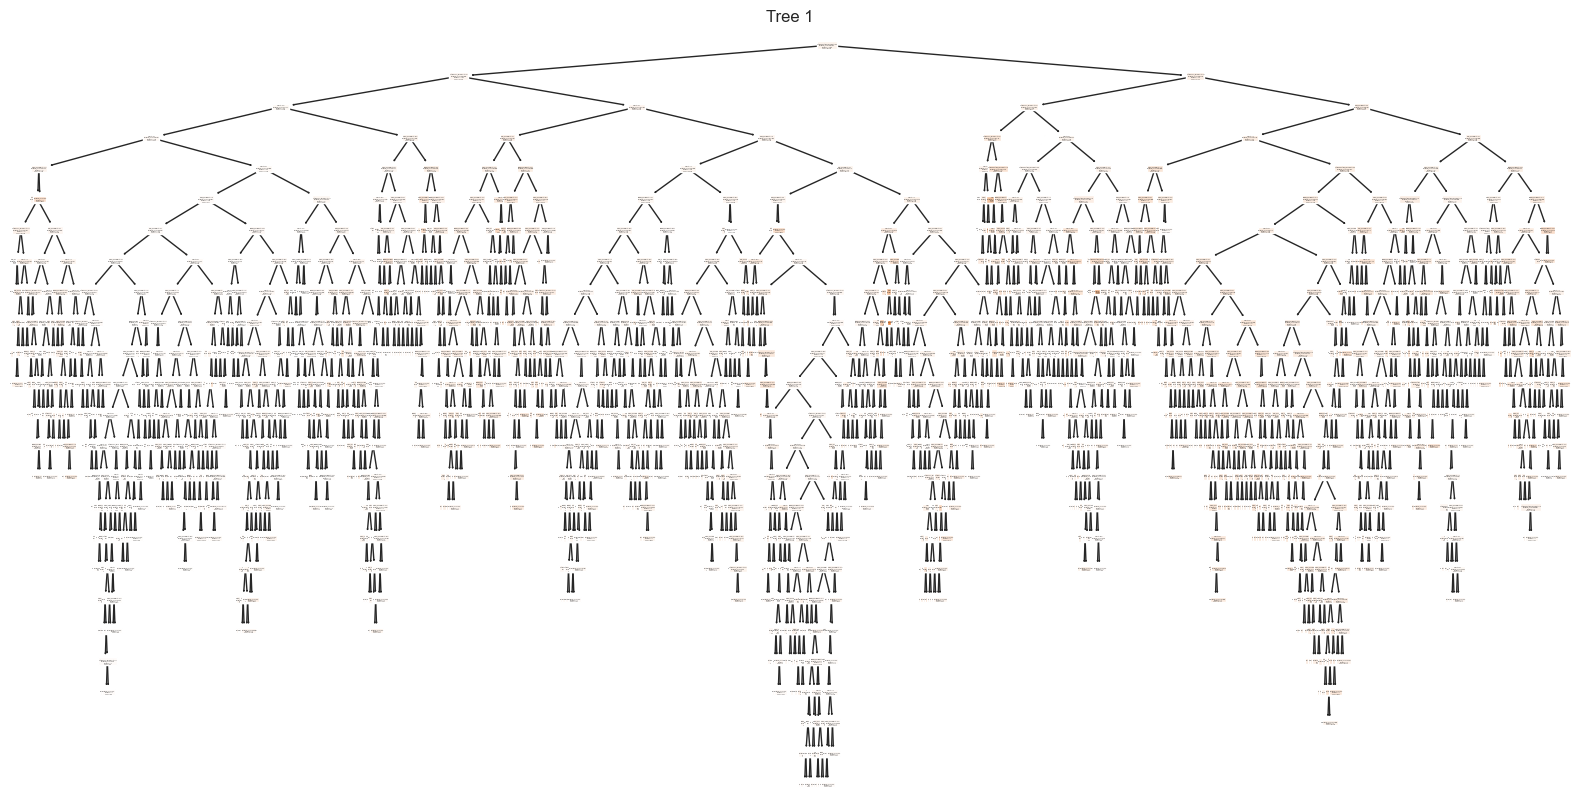

In [8]:
plt.figure(figsize=(20, 10))
plot_tree(regression_forest_model.estimators_[0], feature_names=independent_variables, filled=True)
plt.title('Tree 1')
plt.show()

array([0.18410559, 0.0463989 , 0.27275017, 0.11341397, 0.04955673,
       0.29910268, 0.03467195])